In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
#from pandas_datareader import data as web
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Prepare dataset

In [3]:
assets = ['MAXR.TO']

In [4]:
df = yf.download(assets, period="max")

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-07-11,14.000000,15.350000,13.950000,15.200000,12.732615,582500
2000-07-12,15.650000,15.650000,14.800000,15.150000,12.690730,227000
2000-07-13,15.250000,15.250000,14.500000,14.750000,12.355663,125400
2000-07-14,14.700000,15.000000,14.700000,15.000000,12.565082,35900
2000-07-17,15.050000,15.250000,15.050000,15.200000,12.732615,61000
...,...,...,...,...,...,...
2021-02-02,59.020000,59.450001,56.029999,56.450001,56.450001,134600
2021-02-03,56.459999,58.389999,55.840000,58.389999,58.389999,120300
2021-02-04,60.139999,63.980000,59.169998,62.709999,62.709999,175800


In [6]:
# Create SMA and EMA indicators
def SMA (table, period=30, col='Adj Close'):
    return table[col].rolling(window=period).mean()

def EMA(table, period=24, col='Adj Close'):
    return table[col].ewm(span=period, adjust=False).mean()

In [7]:
# Create a functin to calculate MACD
def MACD(table, period_l=26, period_s=12, period_signal=9, col='Adj Close'):
    ShortEMA = EMA(table, period=period_s, col=col) # Short term EMA
    LongEMA = EMA(table, period=period_l, col=col) # long term EMA
    
    # Calculate and store the MACD into the df
    table['MACD'] = ShortEMA - LongEMA
    
    # Calculate and store the signal line into the df
    table['signal_Line'] = EMA(table, period=period_signal, col='MACD')
    
    return table

In [8]:
# Create a function to calculate the Relative Strength Index (RSI)
def RSI(table, period=14, col='Adj Close'):
    delta = table[col].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    table['up'] = up
    table['down'] = down
    Avg_Gain = SMA(table, period, col='up')
    Avg_Loss = abs(SMA(table, period, col='down'))
    RS = Avg_Gain / Avg_Loss
    RSI = 100.0 - (100.0 / (1.0+RS))
    table['RSI'] = RSI
    
    return table

In [9]:
# Add the indicators to the data set
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

In [10]:
# Create a target col
df['Target'] = np.where(df['Adj Close'].shift(-1) > df['Adj Close'], 1, 0)

In [11]:
# Remove Nulls
df = df.dropna()

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,MACD,signal_Line,up,down,RSI,SMA,EMA,Target
Date,,,,,,,,,,,,,,
2000-08-22,17.299999,17.500000,17.150000,17.500000,14.659263,2400,0.222391,0.280577,0.209416,0.000000,52.205878,14.407960,14.421317,0
2000-08-23,17.500000,17.500000,17.000000,17.250000,14.449846,7400,0.193497,0.263161,0.000000,-0.209416,59.663912,14.465201,14.423600,1
2000-08-24,17.900000,17.900000,17.450001,17.500000,14.659263,7600,0.185359,0.247601,0.209416,0.000000,63.865569,14.530819,14.442453,0
2000-08-25,17.049999,17.200001,17.000000,17.049999,14.282308,5800,0.146801,0.227441,0.000000,-0.376955,57.024772,14.595041,14.429641,1
2000-08-28,17.450001,17.450001,17.000000,17.150000,14.366076,3200,0.121601,0.206273,0.083769,0.000000,50.943415,14.655074,14.424556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-02,59.020000,59.450001,56.029999,56.450001,56.450001,134600,2.972575,4.196961,0.340000,0.000000,57.355024,52.916333,55.106539,1
2021-02-03,56.459999,58.389999,55.840000,58.389999,58.389999,120300,2.816078,3.920784,1.939999,0.000000,60.307623,53.426333,55.369216,1
2021-02-04,60.139999,63.980000,59.169998,62.709999,62.709999,175800,3.005990,3.737825,4.320000,0.000000,55.055888,54.089333,55.956479,1


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Build Xs and Y
col_kept = ['Adj Close', 'MACD', 'signal_Line', 'RSI', 'SMA', 'EMA', 'Volume']
X = df[col_kept].values
Y = df['Target'].values
# Split the train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=False)

## First, try Decision Tree

In [15]:
# Decision Tree classifier
tree = DecisionTreeClassifier(random_state=0, 
                              min_impurity_decrease = 0.00001,
                              criterion='entropy').fit(X_train, Y_train)
path = tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

 Cost complexity pruning is to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

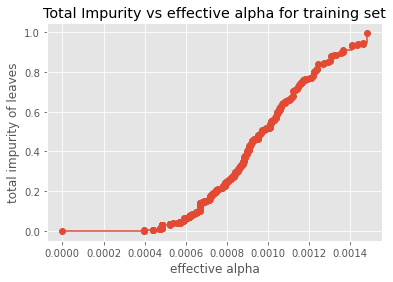

In [16]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [17]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, 
                                 min_impurity_decrease = 0.00001,
                                 criterion='entropy',
                                 ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0023529375944837394


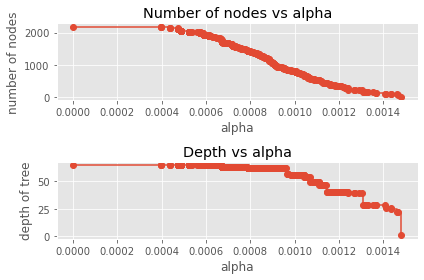

In [18]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

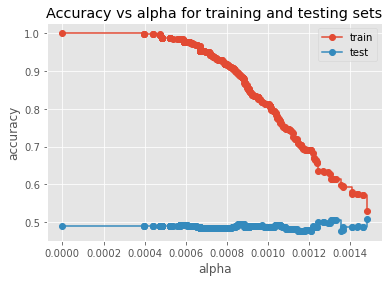

In [19]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## try XGBoosting

In [20]:
from xgboost import XGBClassifier

In [21]:
XGB = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=12,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=40,           # Balancing of positive and negative weights. 
                                                          # should be set to the positive case balancing weight, or #Goods / #Bads.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=0,       # Seed
                            missing=None                  # How are nulls encoded?
                            )

In [22]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [1, 2, 3, 4, 5, 6, 7],
                   'max_depth': [2, 3, 4],
                 'learning_rate' : [0.01, 0.05, 0.1, 0.15]
                  })

# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train_df = df.sample(frac = 0.05,               # The fraction to extract
                                       random_state = 0,    # The seed.
                                       )

In [23]:
from sklearn.model_selection import GridSearchCV

# Define grid search object.
GridXGB = GridSearchCV(XGB,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = -1,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [24]:
# Train grid search.
GridXGB.fit(val_train_df[col_kept], val_train_df['Target'])

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  3.4min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=None, monotone_constraints=None,
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=1, reg_lambda=0,
                                     scale_pos_weight=40, subsample=0.632,
                                     tree_method=None, validate_parameters=None,
                              

In [25]:
# save the model
# import pickle
# pkl_filename = 'xgb_cv.pkl'
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(GridXGB, file)
 

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [26]:
XGB = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=GridXGB.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=GridXGB.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=12,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=40,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=0,       # Seed
                            missing=None                  # How are nulls encoded?
                            )

In [27]:
X = df[col_kept]
Y = df['Target']
# Split the train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=False)

In [28]:
%%time
# Train over all training data.
XGB.fit(X_train, Y_train)

CPU times: user 77.6 ms, sys: 0 ns, total: 77.6 ms
Wall time: 10.9 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=5, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=40, subsample=0.632,
              tree_method='exact', validate_parameters=1, verbosity=1)

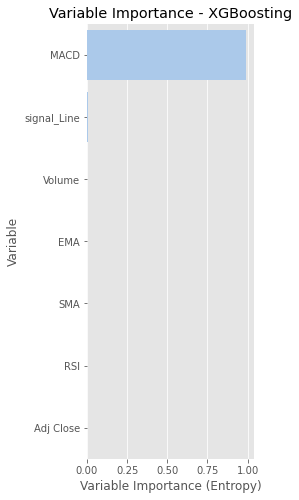

In [29]:
# Plot variable importance
import seaborn as sns
importances = XGB.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[X_train.columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable", xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

In [30]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

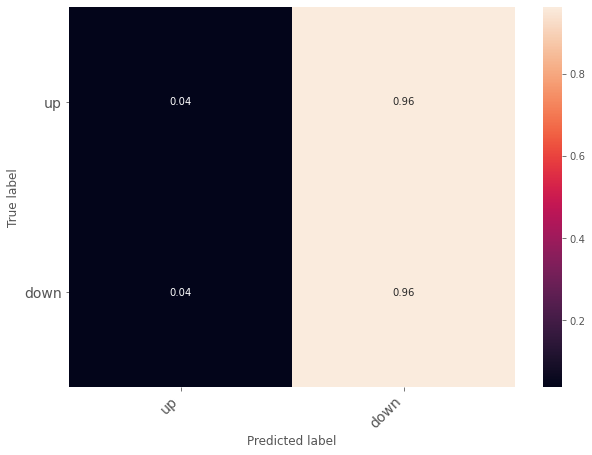

In [31]:
# Calculate probability
XGBClassTest = XGB.predict(X_test)
xg_probs_test = XGB.predict_proba(X_test)
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = Y_test, 
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb, index=['up', 'down'], columns=['up', 'down'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

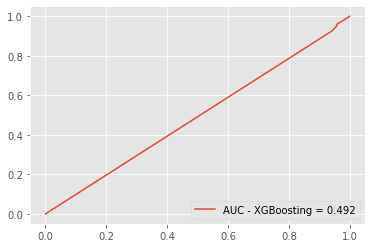

In [32]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(Y_test, 
                                 xg_probs_test)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = Y_test, 
                             y_score = xg_probs_test),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

##  Stacked LSTM
1. Collect stock historical prices.
2. Preprocess -- Train and Test
3. Build an Stacked LSTM
4. Predict test data 
5. Predict future 30 days

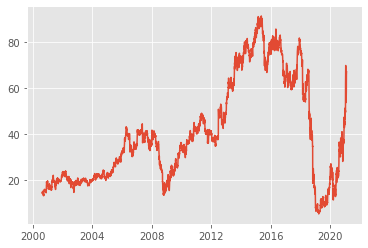

In [36]:
plt.plot(df['Adj Close']) 

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_Adj = scaler.fit_transform(np.array(df['Adj Close']).reshape(-1,1))

In [41]:
scaled_Adj

array([[0.10879518],
       [0.10635303],
       [0.10879518],
       ...,
       [0.66914908],
       [0.70506717],
       [0.71906119]])

In [42]:
## Create preprocessed dataset.
training_size = int(len(scaled_Adj)*0.65)
test_size = len(scaled_Adj) - training_size
training_size, test_size

(3340, 1799)

In [43]:
train_LSTM, test_LSTM = scaled_Adj[:training_size, :], scaled_Adj[training_size:len(scaled_Adj), :1]

In [45]:
test_LSTM

array([[0.78316725],
       [0.78431312],
       [0.78691768],
       ...,
       [0.66914908],
       [0.70506717],
       [0.71906119]])

In [56]:
test_LSTM.shape

(1799, 1)

In [50]:
def preprocess_TS(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step -1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [53]:
time_step = 100
X_train_LSTM, Y_train_LSTM = preprocess_TS(train_LSTM, time_step)
X_test_LSTM, Y_test_LSTM = preprocess_TS(test_LSTM, time_step)

In [55]:
X_test_LSTM

array([[0.78316725, 0.78431312, 0.78691768, ..., 0.82150298, 0.82265783,
        0.83032258],
       [0.78431312, 0.78691768, 0.79889862, ..., 0.82265783, 0.83032258,
        0.83956239],
       [0.78691768, 0.79889862, 0.78316725, ..., 0.83032258, 0.83956239,
        0.87337159],
       ...,
       [0.29084313, 0.29329208, 0.29049327, ..., 0.56337734, 0.59218179,
        0.59614677],
       [0.29329208, 0.29049327, 0.32676118, ..., 0.59218179, 0.59614677,
        0.61877048],
       [0.29049327, 0.32676118, 0.32967661, ..., 0.59614677, 0.61877048,
        0.66914908]])

In [57]:
# reshape input into [samples, time steps, features] which is required for LSTM
X_train_LSTM = X_train_LSTM.reshape(X_train_LSTM.shape[0], X_train_LSTM.shape[1], 1)
X_test_LSTM = X_test_LSTM.reshape(X_test_LSTM.shape[0], X_test_LSTM.shape[1], 1)

In [61]:
X_test_LSTM

array([[[0.78316725],
        [0.78431312],
        [0.78691768],
        ...,
        [0.82150298],
        [0.82265783],
        [0.83032258]],

       [[0.78431312],
        [0.78691768],
        [0.79889862],
        ...,
        [0.82265783],
        [0.83032258],
        [0.83956239]],

       [[0.78691768],
        [0.79889862],
        [0.78316725],
        ...,
        [0.83032258],
        [0.83956239],
        [0.87337159]],

       ...,

       [[0.29084313],
        [0.29329208],
        [0.29049327],
        ...,
        [0.56337734],
        [0.59218179],
        [0.59614677]],

       [[0.29329208],
        [0.29049327],
        [0.32676118],
        ...,
        [0.59218179],
        [0.59614677],
        [0.61877048]],

       [[0.29049327],
        [0.32676118],
        [0.32967661],
        ...,
        [0.59614677],
        [0.61877048],
        [0.66914908]]])

In [66]:
# build a stacked LSTM
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [67]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train_LSTM, 
          Y_train_LSTM, 
          validation_data=(X_test_LSTM, Y_test_LSTM), 
          epochs=100, 
          batch_size=64, 
          verbose=1)

Epoch 1/100
51/51 [==============================] - 14s 224ms/step - loss: 0.0155 - val_loss: 0.0029
Epoch 2/100
51/51 [==============================] - 10s 202ms/step - loss: 4.6411e-04 - val_loss: 0.0021
Epoch 3/100
51/51 [==============================] - 10s 201ms/step - loss: 4.4840e-04 - val_loss: 0.0020
Epoch 4/100
51/51 [==============================] - 10s 197ms/step - loss: 4.8224e-04 - val_loss: 0.0017
Epoch 5/100
51/51 [==============================] - 10s 198ms/step - loss: 4.0946e-04 - val_loss: 0.0018
Epoch 6/100
51/51 [==============================] - 10s 198ms/step - loss: 3.9869e-04 - val_loss: 0.0014
Epoch 7/100
51/51 [==============================] - 10s 196ms/step - loss: 3.5845e-04 - val_loss: 0.0013
Epoch 8/100
51/51 [==============================] - 10s 195ms/step - loss: 3.3317e-04 - val_loss: 0.0013
Epoch 9/100
51/51 [==============================] - 10s 195ms/step - loss: 2.9760e-04 - val_loss: 0.0016
Epoch 10/100
51/51 [==============================

In [70]:
# predict
train_LSTM_predict = model.predict(X_train_LSTM)
test_LSTM_predict = model.predict(X_test_LSTM)

In [71]:
# transfor back to normal scale
train_LSTM_predict = scaler.inverse_transform(train_LSTM_predict)
test_LSTM_predict = scaler.inverse_transform(test_LSTM_predict)

In [73]:
# Calculate RMSE metrics
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_train_LSTM, train_LSTM_predict))

34.28228372786637

In [75]:
# for the test set
np.sqrt(mean_squared_error(Y_test_LSTM, test_LSTM_predict))

59.67878160188203

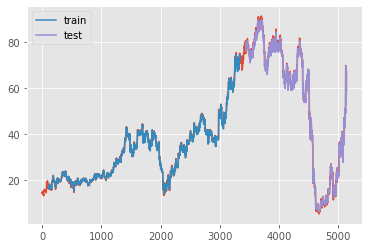

In [79]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(scaled_Adj)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(train_LSTM_predict)+look_back, :] = train_LSTM_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_Adj)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_LSTM_predict)+(look_back*2)+1:len(scaled_Adj)-1, :] = test_LSTM_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(scaled_Adj))
plt.plot(trainPredictPlot, label="train")
plt.plot(testPredictPlot, label="test")
plt.legend(loc="upper left")
plt.show()

In [84]:

x_input= test_LSTM[len(test_LSTM)-time_step:].reshape(1,-1)
x_input.shape

(1, 100)

In [83]:
len(test_LSTM)

1799

In [85]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
temp_input

[0.32967660682697153,
 0.33620718206686007,
 0.3599970870629853,
 0.3841368292106726,
 0.37329143265320097,
 0.36722733660599827,
 0.3251285459130455,
 0.3065864428628272,
 0.31533270529616486,
 0.3341080701856782,
 0.3440205528436825,
 0.32571162266095066,
 0.35078432319400965,
 0.34250451771040574,
 0.34565318553217855,
 0.3556822657454022,
 0.38168788017792854,
 0.37515730493803995,
 0.3790056915488415,
 0.39404926738277263,
 0.3896178485099703,
 0.3780727331634699,
 0.38996768566153245,
 0.4159733000940588,
 0.4078100921656742,
 0.3910172416021234,
 0.3910172416021234,
 0.39719793520454544,
 0.370609244024114,
 0.3533499142678774,
 0.3467027414727695,
 0.3512508023866955,
 0.33842289150326127,
 0.3443703899952447,
 0.35941401031508013,
 0.3539329910157825,
 0.3711923207720191,
 0.2655372081104655,
 0.26775293978981884,
 0.3018051201096062,
 0.2992395512786906,
 0.2963241230532607,
 0.3208137245954625,
 0.3216300409397105,
 0.3591807707187372,
 0.3602303266593282,
 0.360580163810890

In [88]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7097846]
101
1 day input [0.33620718 0.35999709 0.38413683 0.37329143 0.36722734 0.32512855
 0.30658644 0.31533271 0.33410807 0.34402055 0.32571162 0.35078432
 0.34250452 0.34565319 0.35568227 0.38168788 0.3751573  0.37900569
 0.39404927 0.38961785 0.37807273 0.38996769 0.4159733  0.40781009
 0.39101724 0.39101724 0.39719794 0.37060924 0.35334991 0.34670274
 0.3512508  0.33842289 0.34437039 0.35941401 0.35393299 0.37119232
 0.26553721 0.26775294 0.30180512 0.29923955 0.29632412 0.32081372
 0.32163004 0.35918077 0.36023033 0.36058016 0.34716918 0.35393299
 0.3574315  0.36979293 0.37329143 0.37690658 0.35848105 0.35999709
 0.35754814 0.36069676 0.39299971 0.40372851 0.42168756 0.42122108
 0.45282431 0.48967532 0.44361155 0.46133736 0.46075428 0.44034628
 0.43719761 0.44955905 0.44302847 0.46740145 0.46798453 0.45142492
 0.46005456 0.51171595 0.47836345 0.48967532 0.51253227 0.53608893
 0.51428154 0.51568094 0.52337767 0.5140483  0.62378502 0.66086927
 0.75089771 0.74448373 0.69142299 

In [89]:
day_new = np.arange(1,1 + time_step)
day_pred = np.arange(1 + time_step,30 + 1 + time_step)

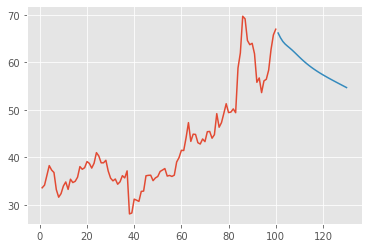

In [91]:
plt.plot(day_new,scaler.inverse_transform(scaled_Adj[len(scaled_Adj) - 100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))